# Practical Implementation of Statistics to Analyze Data

### Gaurav Sahu



In [135]:
# Importing libraries
import numpy as np
import seaborn as sns
import statistics as stat
import matplotlib.pyplot as plt
import random
import pandas as pd
from numpy.random import randn

##### Importing Titatnic Dataset

In [8]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
# Features Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
# Extracting Numerical Data 
numeric_df =  df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### 1) Measure of Central Tendency

##### MEAN 

In [11]:
 np.mean(numeric_df)

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

As per dataset, on average survival rate of passengers is 38%.
Mean fare paid by passengers is $32.
Mean age of passengers 29.7 yrs.

##### MEDIAN

In [12]:
np.median(numeric_df,axis=0)

array([ 0.    ,  3.    ,     nan,  0.    ,  0.    , 14.4542])

##### MODE

In [13]:
modes = {}
for column in numeric_df.columns:
    mode_value = numeric_df[column].mode()[0]
    modes[column] = mode_value

for column, mode_value in modes.items():
    print("Mode of '{}': {}".format(column, mode_value))


Mode of 'survived': 0
Mode of 'pclass': 3
Mode of 'age': 24.0
Mode of 'sibsp': 0
Mode of 'parch': 0
Mode of 'fare': 8.05


### 2) Measure of Dispersion

##### Variance

In [14]:
variances = {}
for column in numeric_df.columns:
    variances[column] = numeric_df[column].var()

for column, variance in variances.items():
    print(f"Variance of '{column}' column: {variance}")


Variance of 'survived' column: 0.2367722165474984
Variance of 'pclass' column: 0.6990151199889065
Variance of 'age' column: 211.0191247463081
Variance of 'sibsp' column: 1.2160430774662894
Variance of 'parch' column: 0.6497282437357467
Variance of 'fare' column: 2469.436845743117


##### Standard Deviation

In [15]:
std_devs = {}
for column in numeric_df.columns:
    std_devs[column] = numeric_df[column].std()
for column, std_dev in std_devs.items():
    print(f"Standard deviation of '{column}' column: {std_dev}")

Standard deviation of 'survived' column: 0.4865924542648585
Standard deviation of 'pclass' column: 0.8360712409770513
Standard deviation of 'age' column: 14.526497332334044
Standard deviation of 'sibsp' column: 1.1027434322934275
Standard deviation of 'parch' column: 0.8060572211299559
Standard deviation of 'fare' column: 49.693428597180905


In [16]:
# zeroth percentile
np.percentile(numeric_df['fare'],0)

0.0

In [17]:
q1 = np.percentile(numeric_df['fare'],25)  # 1st Quartile
q2 = np.percentile(numeric_df['fare'],50)  # 2nd Quartile
q3 = np.percentile(numeric_df['fare'],75)  # 3rd Quartile
q4 = np.percentile(numeric_df['fare'],100) # 4th Quartile

In [58]:
IQR= q3-q1
lower_fence=  q1-1.5*(IQR)
higher_fence= q3+1.5*(IQR)
lower_fence,higher_fence

(-26.724, 65.6344)

### 3) Covariance & Correlation

In [18]:
numeric_df.corr("pearson")

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [95]:
numeric_df.corr("spearman")

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
pclass,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
age,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
sibsp,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
parch,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
fare,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


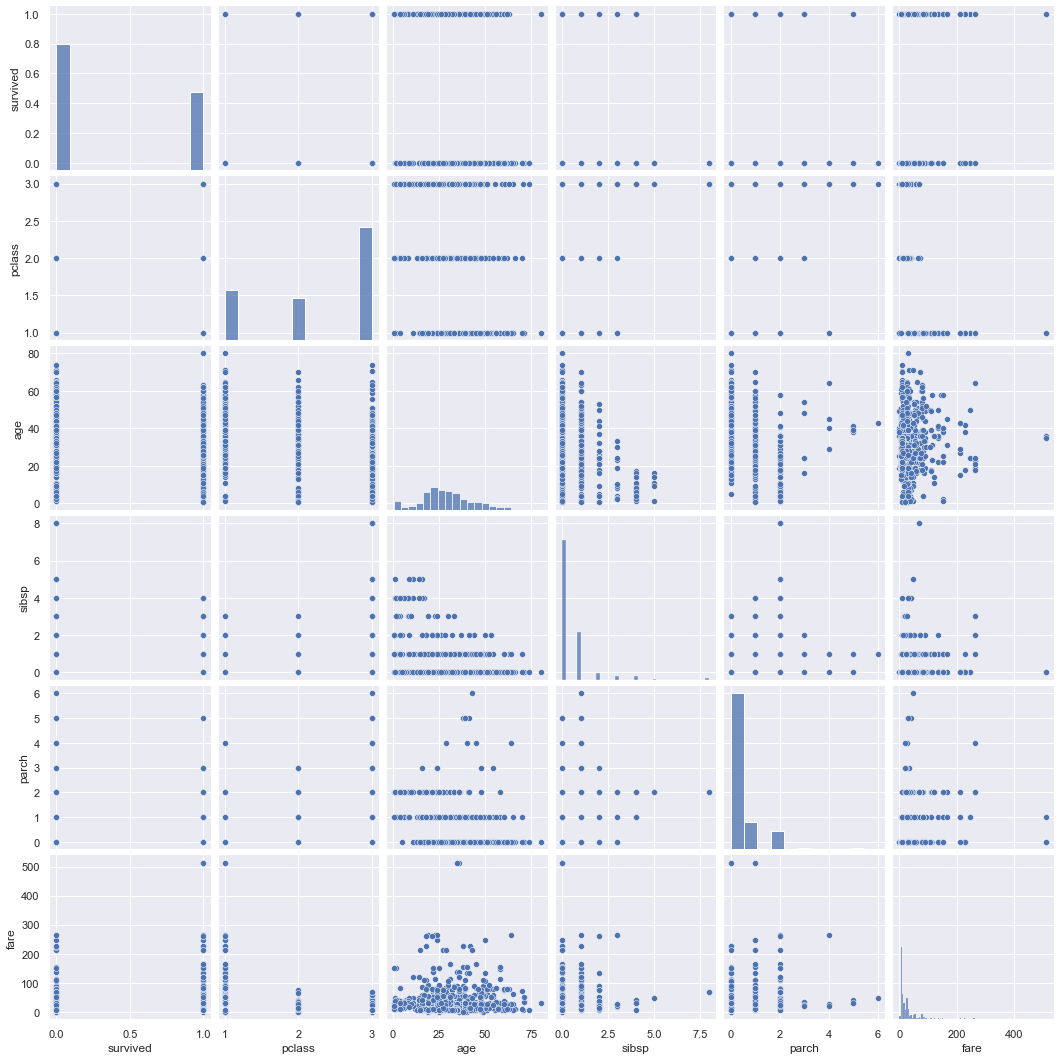

In [98]:
sns.pairplot(numeric_df)

In [92]:
np.cov(numeric_df['survived'],numeric_df['age'])

array([[0.23677222,        nan],
       [       nan,        nan]])

In [93]:
numeric_df.cov()

,survived,pclass,age,sibsp,parch,fare
survived,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
pclass,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
age,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
sibsp,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
parch,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
fare,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


### 4) Histogram and Skewness

<AxesSubplot:xlabel='age', ylabel='Count'>

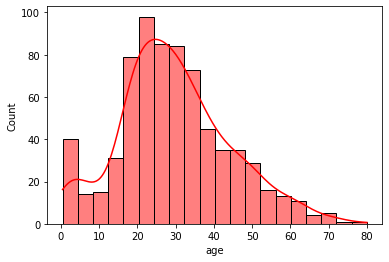

In [64]:
sns.histplot(numeric_df['age'], kde=True,color="red")

<AxesSubplot:xlabel='fare', ylabel='Count'>

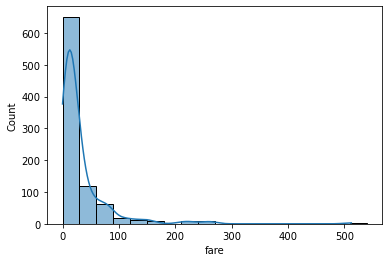

In [61]:
sns.histplot(numeric_df['fare'], kde=True, inwidth=30)

# Positive Right Skewed 

### 5) Box Plot

<AxesSubplot:>

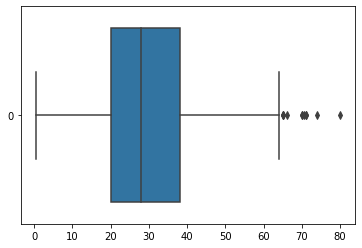

In [28]:
sns.boxplot(data = numeric_df['age'], orient="h")

<AxesSubplot:>

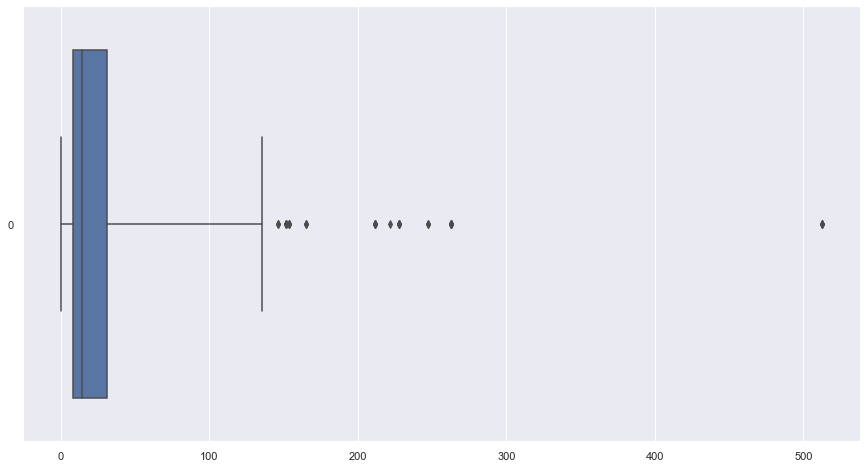

In [44]:
sns.boxplot(data = numeric_df['fare'], orient="h",whis=5)

<AxesSubplot:>

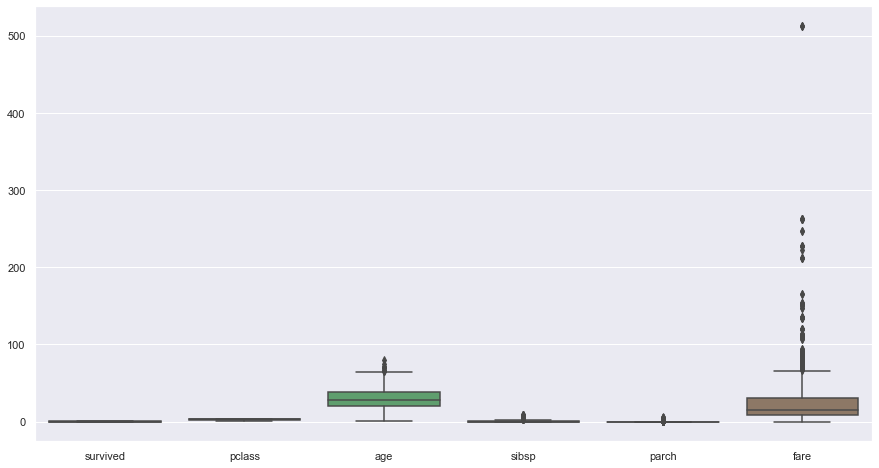

In [33]:
sns.boxplot(data = numeric_df, orient="v")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

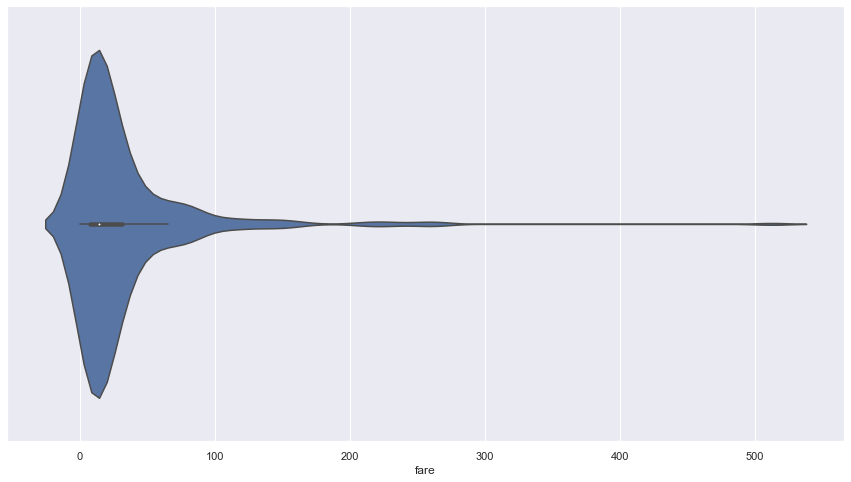

In [46]:
sns.violinplot(df['fare'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

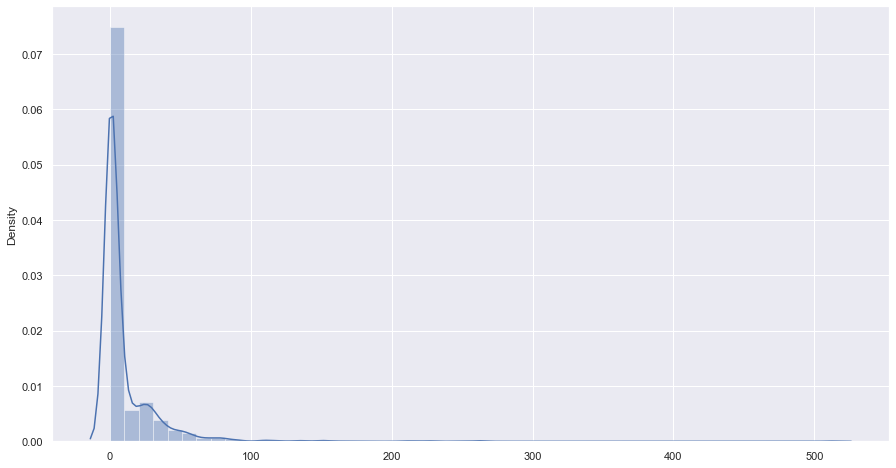

In [57]:
sns.distplot(numeric_df)

###  6)  Standardization


In [59]:
mean = numeric_df.mean()
std_dev = numeric_df.std()

# Standardize the dataset
standardized_df = (numeric_df - mean) / std_dev
standardized_df

,survived,pclass,age,sibsp,parch,fare
0,-0.788829,0.826913,-0.530005,0.432550,-0.473408,-0.502163
1,1.266279,-1.565228,0.571430,0.432550,-0.473408,0.786404
2,1.266279,0.826913,-0.254646,-0.474279,-0.473408,-0.488580
3,1.266279,-1.565228,0.364911,0.432550,-0.473408,0.420494
4,-0.788829,0.826913,0.364911,-0.474279,-0.473408,-0.486064
...,...,...,...,...,...,...
886,-0.788829,-0.369158,-0.185807,-0.474279,-0.473408,-0.386454
887,1.266279,-1.565228,-0.736524,-0.474279,-0.473408,-0.044356
888,-0.788829,0.826913,NaN,0.432550,2.007806,-0.176164
889,1.266279,-1.565228,-0.254646,-0.474279,-0.473408,-0.044356


<AxesSubplot:ylabel='Density'>

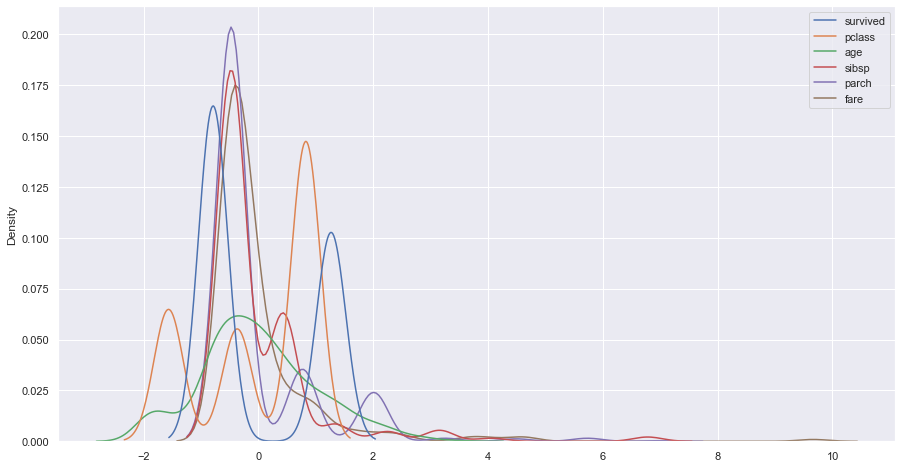

In [60]:
sns.kdeplot(data = standardized_df)

### 7) Normalization

In [61]:
normalized_df = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())
normalized_df

,survived,pclass,age,sibsp,parch,fare
0,0.0,1.0,0.271174,0.125,0.000000,0.014151
1,1.0,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,1.0,0.321438,0.000,0.000000,0.015469
3,1.0,0.0,0.434531,0.125,0.000000,0.103644
4,0.0,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374
887,1.0,0.0,0.233476,0.000,0.000000,0.058556
888,0.0,1.0,NaN,0.125,0.333333,0.045771
889,1.0,0.0,0.321438,0.000,0.000000,0.058556


#####  min, max, mean and standard deviation of normalized dataset


In [62]:
normalized_df.min()

survived    0.0
pclass      0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
dtype: float64

In [63]:
normalized_df.max()

survived    1.0
pclass      1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
dtype: float64

In [64]:
normalized_df.mean()

survived    0.383838
pclass      0.654321
age         0.367921
sibsp       0.065376
parch       0.063599
fare        0.062858
dtype: float64

In [65]:
normalized_df.std()

survived    0.486592
pclass      0.418036
age         0.182540
sibsp       0.137843
parch       0.134343
fare        0.096995
dtype: float64

<AxesSubplot:ylabel='Density'>

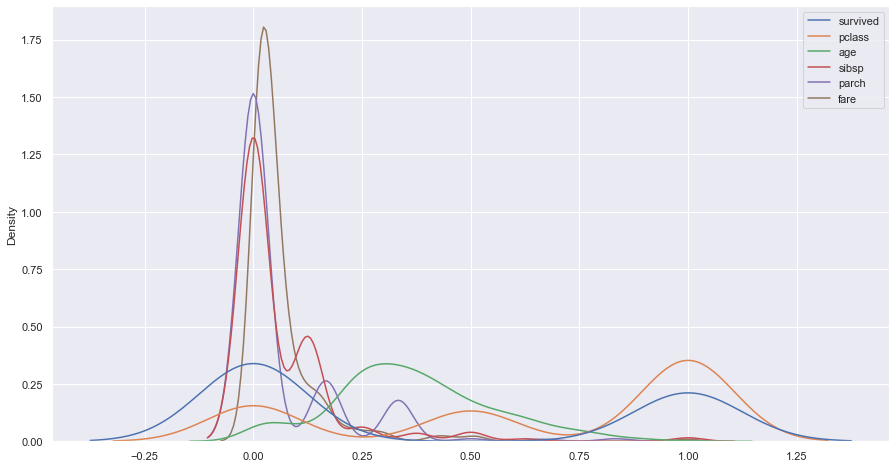

In [66]:
 sns.kdeplot(data = normalized_df)

### 8) Central Limit Theorem

In [67]:
mean_CLT = numeric_df['fare'].mean()
std_CLT= numeric_df['fare'].std()
print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_CLT,std_CLT))


population mean (μ): 32.2042079685746
population standard deviation (σ): 49.693428597180905


<AxesSubplot:xlabel='fare', ylabel='Count'>

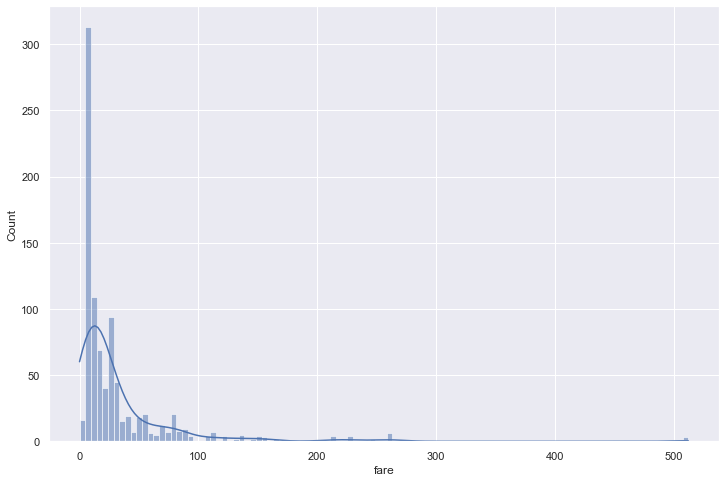

In [78]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(numeric_df['fare'], kde=True)

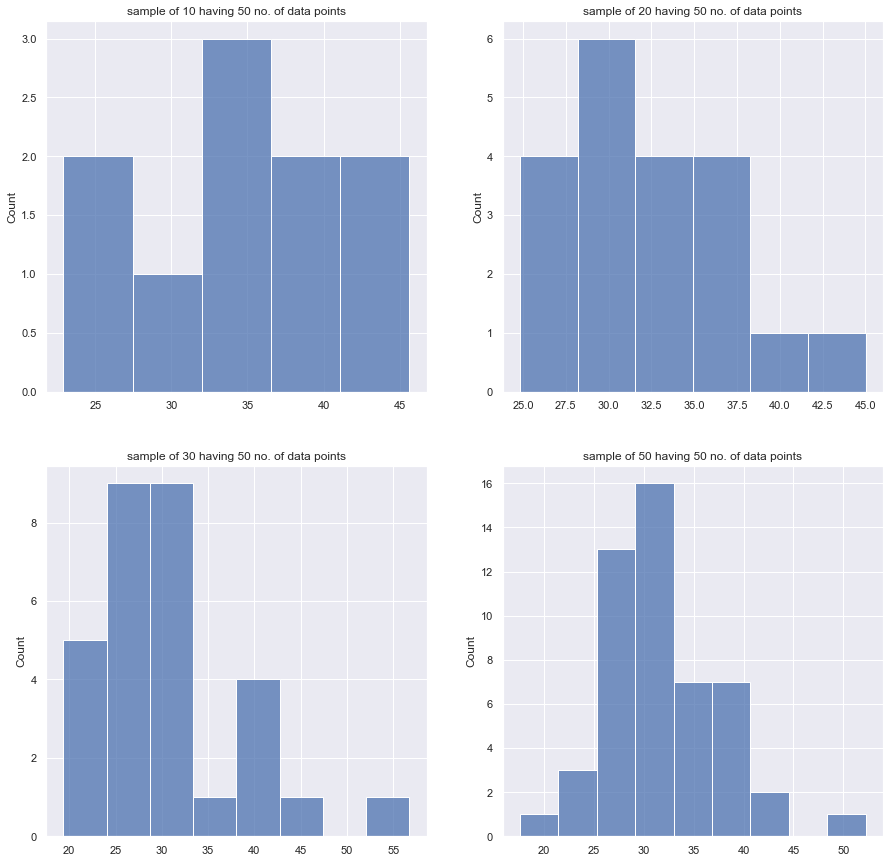

In [91]:
def mean_distribution(data, samples_count, data_points_count):
    list_sample = list()
    data = np.array(data.values)
    for i in range(0, samples_count):
        samples = random.sample(range(0, data.shape[0]), data_points_count)
        list_sample.append(data[samples].mean())
    return np.array(list_sample)
count = 0
mean_list = list()
fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
lst = [(10,50),(20,50),(30,50),(50,50)]
for i in (0,1):
    for j in (0,1):
        ax[i,j].set_title("sample of " + str(lst[count][0]) + " having " + str(lst[count][1])+" no. of data points")
        sns.histplot(mean_distribution(numeric_df['fare'], lst[count][0], lst[count][1]),ax= ax[i,j])
        mean_list.append(mean_distribution(numeric_df['fare'], lst[count][0],lst[count][1]))
        count +=1

### Generating random numbers

In [100]:
population=np.random.binomial(10,0.5,10000)
population

array([4, 5, 1, ..., 6, 6, 3])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

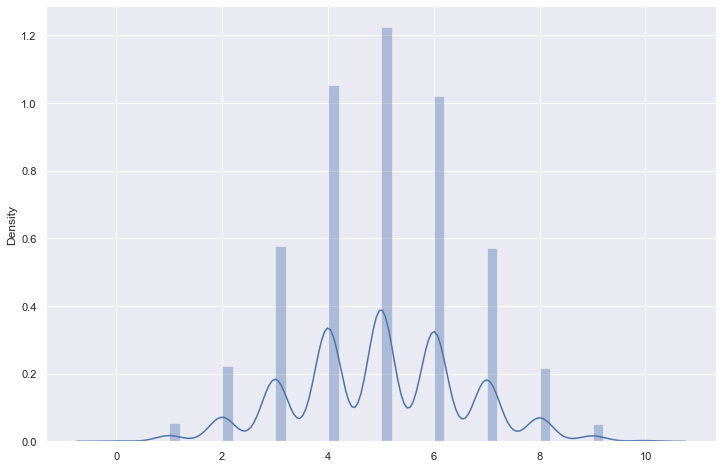

In [101]:
sns.distplot(population)

In [105]:
size=int(len(population)*0.30)
sample_mean=[]
for i in range(1,100):
    sample=np.random.choice(population,size=size)
    sample_mean.append(np.mean(sample))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

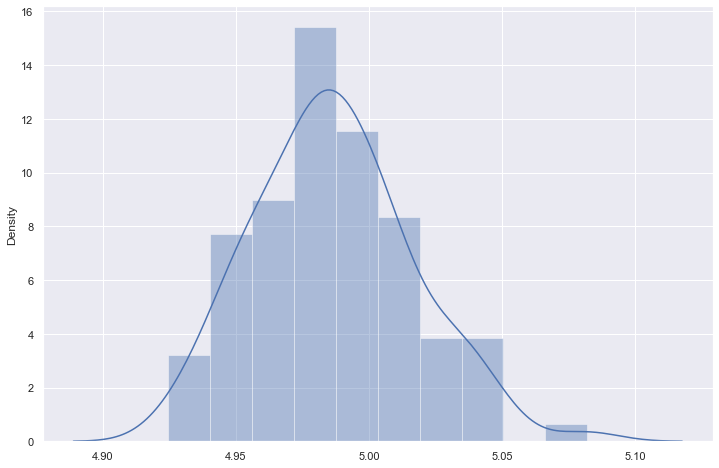

In [106]:
sns.distplot(sample_mean)

### 9) Z-test

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

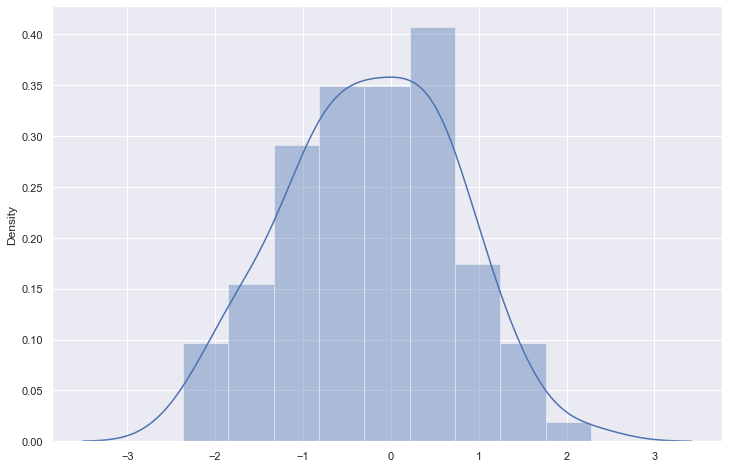

In [113]:
citizens=randn(100)
sns.distplot(citizens)

In [120]:
print(f"here is a mean of the population: {np.mean(population)},here is a std dev {np.std(population)}")
C_I=0.95   #confidence interval    
ALPHA=0.05

here is a mean of the population: 4.9889,here is a std dev 1.5830277287527215


In [126]:
null_mean= 0.022

In [127]:
from statsmodels.stats.weightstats import ztest
z_score,p_value=ztest(citizens,value=null_mean,alternative='larger')

In [128]:
z_score

-2.6637811064931833

In [129]:
p_value

0.9961366088321739

In [130]:
if (p_value<ALPHA):
    print("reject the null hyphothesis")
else:
    print("we are going to accpept the null hyphothesis")

we are going to accpept the null hyphothesis


### 10) CHI-SQURE TEST

In [132]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [133]:
df[['sex','survived']]

,sex,survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [137]:
dataset_table=pd.crosstab(df['sex'],df['survived'])

In [144]:
Observed_Values=dataset_table.values
print(f"observed value(real value) \n {Observed_Values}")

observed value(real value) 
 [[ 81 233]
 [468 109]]


In [145]:
import scipy.stats as stats
stats_test,p,dof,Expected_Values=stats.chi2_contingency(Observed_Values)

In [146]:
p

1.1973570627755645e-58

In [147]:
Expected_Values

array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]])

In [148]:
dataset_table

survived,0,1
sex,,
female,81,233
male,468,109


In [149]:
from scipy.stats import chi2
chisqure_test=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])

In [150]:
chisqure_test

array([100.96890722, 162.08166685])

In [152]:
chi_square_statistic=chisqure_test[0]+chisqure_test[1]

In [154]:
from scipy.stats import chi2
alpha=0.05
critical_value=chi2.ppf(1-alpha,df=dof)

In [155]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


### 11) T-test

In [161]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(df['fare'],30)

In [162]:
p_value

0.18583845591428397

In [163]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


##### Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [164]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [165]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [166]:
weight_df

,weight_10,weight_20,weight_change
0,25,21.640673,-3.359327
1,30,30.123078,0.123078
2,28,23.230750,-4.769250
3,35,36.451792,1.451792
4,28,29.790227,1.790227
5,34,33.818910,-0.181090
6,26,27.575157,1.575157
7,29,23.188192,-5.811808
8,30,22.694990,-7.305010
9,26,28.670190,2.670190


In [167]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [168]:
p_value

0.364625517085174

In [169]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


### 12) Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

In [170]:
df_anova = df[['fare','sex']]

In [173]:
grps = pd.unique(df_anova.sex.values)
grps

array(['male', 'female'], dtype=object)

In [174]:
d_data = {grp:df_anova['fare'][df_anova.sex == grp] for grp in grps}

In [175]:
d_data

{'male': 0       7.2500
 4       8.0500
 5       8.4583
 6      51.8625
 7      21.0750
         ...   
 883    10.5000
 884     7.0500
 886    13.0000
 889    30.0000
 890     7.7500
 Name: fare, Length: 577, dtype: float64,
 'female': 1      71.2833
 2       7.9250
 3      53.1000
 8      11.1333
 9      30.0708
         ...   
 880    26.0000
 882    10.5167
 885    29.1250
 887    30.0000
 888    23.4500
 Name: fare, Length: 314, dtype: float64}

In [176]:
F, p = stats.f_oneway(d_data['male'], d_data['female'])

In [177]:
p

4.230867870041279e-08

In [178]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
